In [1]:
from math import ceil, sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
paths = [
    ('/home/ilya/Desktop/graphql-js_as.csv', 'GraphQL-js'),
    ('/home/ilya/Desktop/vue_as.csv', 'Vue'),
    ('/home/ilya/Desktop/react_as.csv', 'React'),
]
dfs = []
for p in paths:
    dfs.append(pd.read_csv(p[0]))

In [3]:
for (i, df) in enumerate(dfs):
    na_count = df.isna().sum().sum()
    functions_count = df['Identifier'].size
    print('File: {}'.format(paths[i][0]))
    print('NA values count: {}'.format(na_count))
    print('Functions count: {}\n'.format(functions_count))

File: /home/ilya/Desktop/graphql-js_as.csv
NA values count: 0
Functions count: 308

File: /home/ilya/Desktop/vue_as.csv
NA values count: 0
Functions count: 579

File: /home/ilya/Desktop/react_as.csv
NA values count: 0
Functions count: 3918



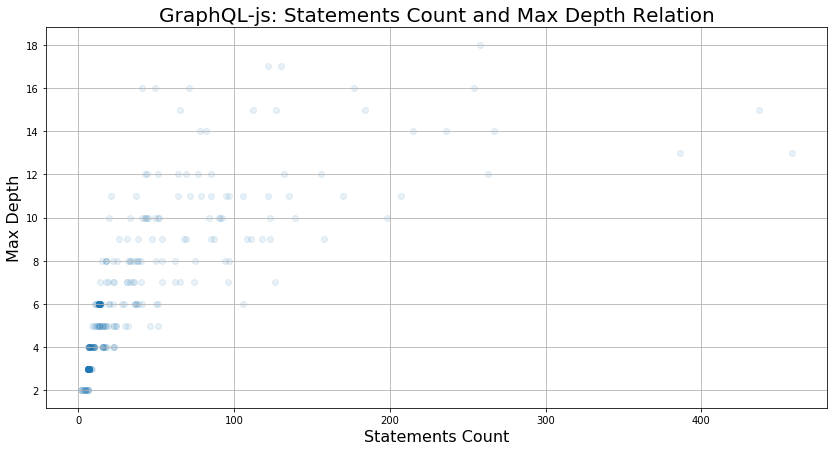

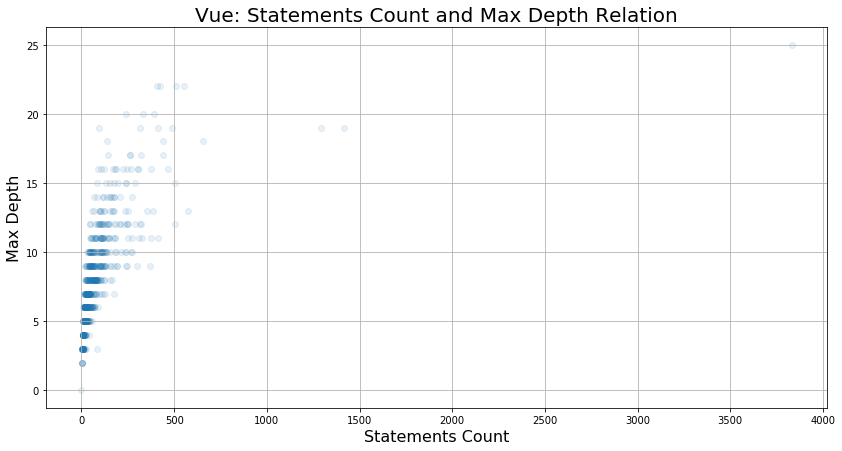

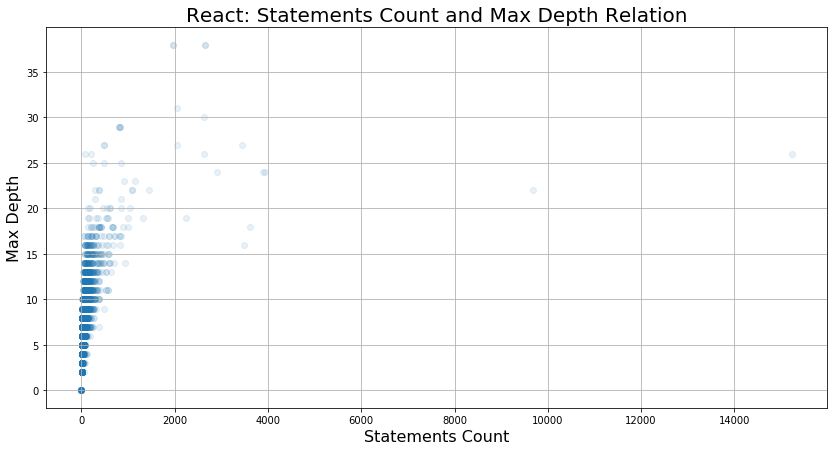

In [4]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['figure.facecolor'] = 'white'

for (i, df) in enumerate(dfs):
    if df.size > 0:
        plt.scatter(df['Statements Count'], df['Max Depth'], alpha=0.1)
        
        plt.title('{0}: Statements Count and Max Depth Relation'.format(paths[i][1]), fontsize=20)
        plt.ylabel('Max Depth', fontsize=16)
        plt.xlabel('Statements Count', fontsize=16)
        
        plt.grid()
        plt.show()

In [5]:
arity_df = pd.DataFrame({ paths[i][1]: dfs[i]['Arity'] for i in np.arange(len(dfs))})
max_depth_df = pd.DataFrame({ paths[i][1]: dfs[i]['Max Depth'] for i in np.arange(len(dfs))})
stmts_count_df = pd.DataFrame({ paths[i][1]: dfs[i]['Statements Count'] for i in np.arange(len(dfs))})

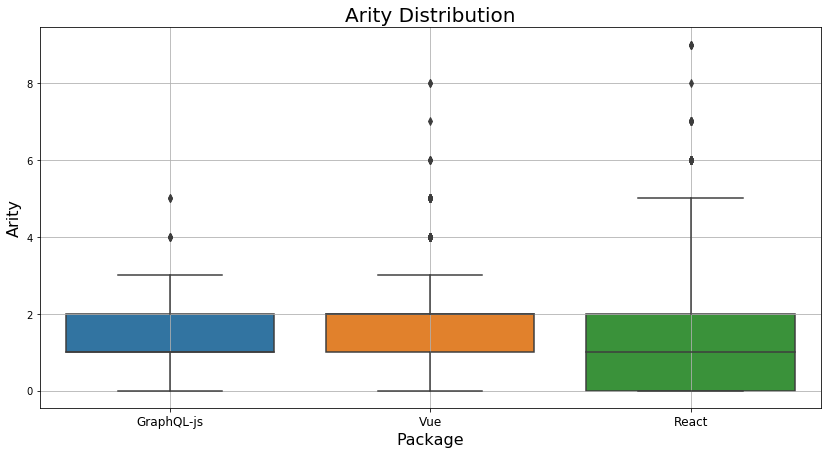

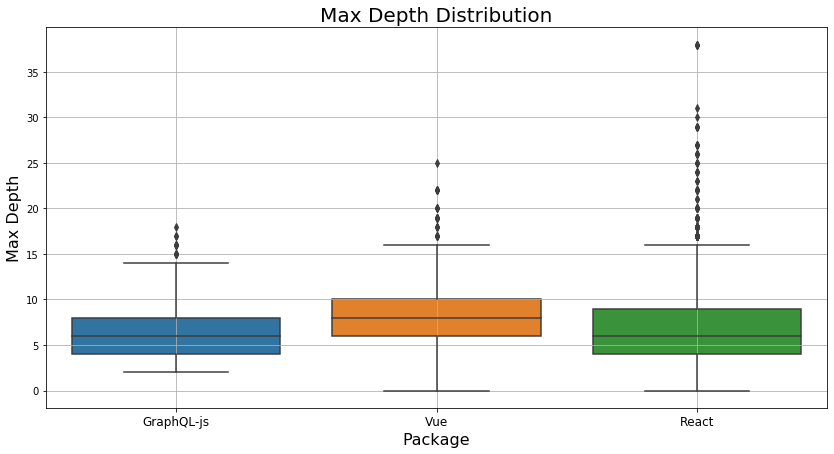

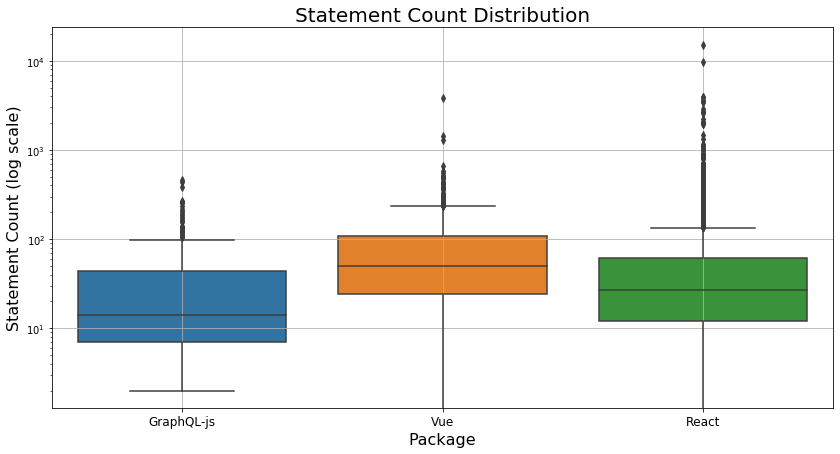

In [6]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['figure.facecolor'] = 'white'

plt.title('Arity Distribution'.format(paths[i][1]), fontsize=20)
sns.boxplot(data=arity_df)
plt.ylabel('Arity', fontsize=16)
plt.xlabel('Package', fontsize=16)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

plt.title('Max Depth Distribution'.format(paths[i][1]), fontsize=20)
sns.boxplot(data=max_depth_df)
plt.ylabel('Max Depth', fontsize=16)
plt.xlabel('Package', fontsize=16)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

plt.title('Statement Count Distribution'.format(paths[i][1]), fontsize=20)
sns.boxplot(data=stmts_count_df)
plt.ylabel('Statement Count (log scale)', fontsize=16)
plt.yscale('log')
plt.xlabel('Package', fontsize=16)
plt.xticks(fontsize=12)
plt.grid()
plt.show()